# Prosopagnosia challenge

![Spectacles](https://cdn.vox-cdn.com/thumbor/z0QEPe4zse8wnDnnGIcj7MXNR8M=/0x0:2000x1125/920x613/filters:focal(840x403:1160x723):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/65007689/1_PRIMARY_Spectacles3_Campaign.0.jpg)

**Team 002**, Ramon Viñas

Many thanks to Jo Baker, Doris Webb, Anton Chepaldin, Hector Minto, and Owain Williams, for all the ideas and insightful comments.

In [1]:
import face_recognition
import matplotlib.pyplot as plt
import numpy as np

### Loading the data

First of all, we define two lists of `known` and `unknown` people for someone with _prosopagnosia_:

In [2]:
known_people = ['Angela_Bassett',
                'Bill_Gates',
                'Emma_Watson',
                'Nelson_Mandela',
                'Nicole_Kidman',
                'Yao_Ming']
unknown_people = ['Ben_Affleck',
                  'Giannina_Facio',
                  'Hillary_Clinton',
                  'Michelle_Pfeiffer',
                  'Zinedine_Zidane',
                  'Ziwang_Xu']

Next, we load images from known (`known_people`) and unknown people (`unknown_people`) and use the `face_recognition` library to compute features that describe various characteristics of their faces (e.g. shape, hair style, ...).
We downloaded data from http://vis-www.cs.umass.edu to `base_dir`.

In [3]:
base_dir = '/local/scratch/rv340/prosopagnosia/lfw'

# Load images
reference_images = [face_recognition.load_image_file('{}/{}/{}_0001.jpg'.format(base_dir, name, name)) for name in known_people]
known_images = [face_recognition.load_image_file('{}/{}/{}_0002.jpg'.format(base_dir, name, name)) for name in known_people]
unknown_images = [face_recognition.load_image_file('{}/{}/{}_0001.jpg'.format(base_dir, name, name)) for name in unknown_people]

# Compute encodings
reference_encodings =  [face_recognition.face_encodings(img)[0] for img in reference_images]
known_encodings = [face_recognition.face_encodings(img)[0] for img in known_images]
unknown_encodings = [face_recognition.face_encodings(img)[0] for img in unknown_images]

### Visualising the reference faces for someone with prosopagnosia

We now visualise `reference_images`, that is, images of people known by someone with _prosopagnosia_ which are stored in a database.

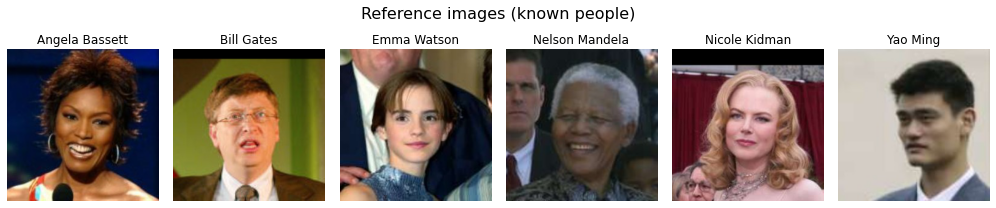

In [4]:
fig = plt.figure(figsize=(14, 3))
plt.suptitle('Reference images (known people)', fontsize=16)
for i, img in enumerate(reference_images):
    plt.subplot(1, len(reference_images), i+1)
    plt.imshow(img)
    plt.title(known_people[i].replace('_', ' '))
    plt.axis('off')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

### Matching known faces to reference images

Given an new, unseen image from a known person, we can use `face_recognition.compare_faces` to match it with the `reference_images`.

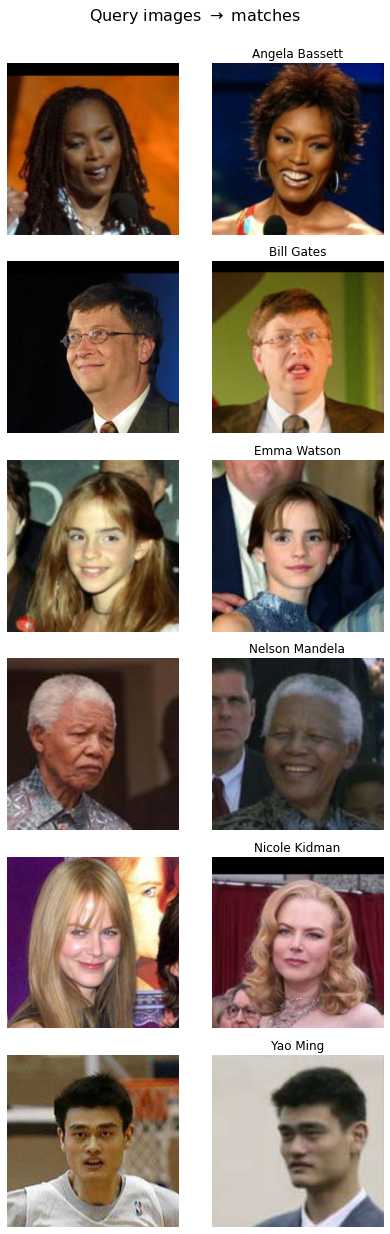

In [5]:
fig = plt.figure(figsize=(6, 18))
plt.suptitle(r'Query images $\rightarrow$ matches', fontsize=16)
for i, img in enumerate(known_images):
    plt.subplot(len(known_images), 2, 2*i+1)
    out = plt.imshow(img)
    plt.axis('off')
    
    results = face_recognition.compare_faces(reference_encodings, known_encodings[i])
    idx = np.argwhere(np.array(results)).ravel()
    plt.subplot(len(known_images), 2, 2*i+2)
    if len(idx) == 0: # Unknown
        plt.text(0.5, 0.5,'Unknown', ha='center', va='center', fontsize=16)
        plt.xticks([], [])
        plt.yticks([], [])
    else: # Known
        idx = idx[0]
        plt.imshow(reference_images[idx])    
        plt.title(known_people[i].replace('_', ' '))
        plt.axis('off')
    
fig.tight_layout(rect=[0, 0.03, 1, 0.98])

### Matching unknown faces to reference images

Finally, if the query image corresponds to someone unknown, the model will not be able to match it with any `reference_image`:

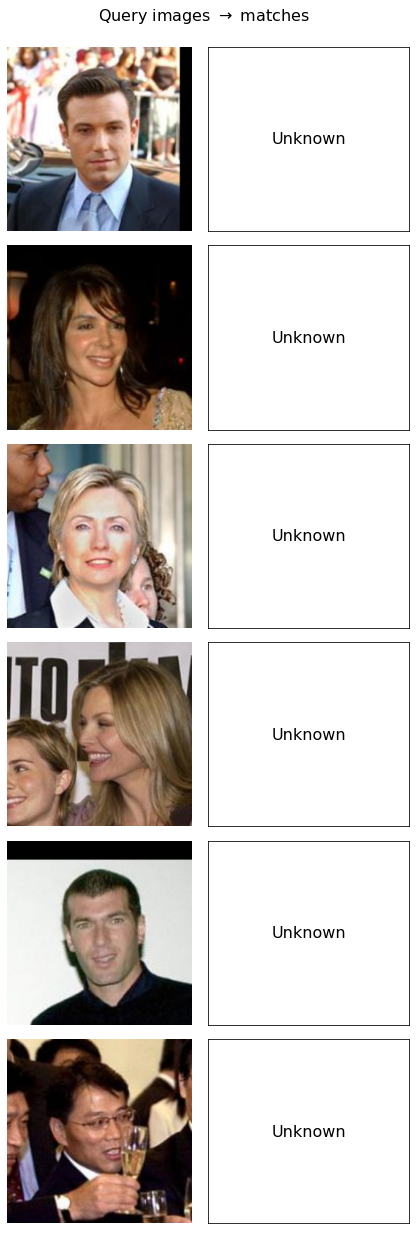

In [6]:
fig = plt.figure(figsize=(6, 18))
plt.suptitle(r'Query images $\rightarrow$ matches', fontsize=16)
for i, img in enumerate(unknown_images):
    plt.subplot(len(unknown_images), 2, 2*i+1)
    out = plt.imshow(img)
    plt.axis('off')
    
    results = face_recognition.compare_faces(reference_encodings, unknown_encodings[i])
    idx = np.argwhere(np.array(results)).ravel()
    if len(idx) == 0:
        plt.subplot(len(unknown_images), 2, 2*i+2)
        plt.text(0.5, 0.5,'Unknown', ha='center', va='center', fontsize=16)
        plt.xticks([], [])
        plt.yticks([], [])
    else:
        idx = idx[0]
        plt.subplot(len(unknown_images), 2, 2*i+2)
        plt.imshow(reference_images[idx])    
        plt.title(known_people[i].replace('_', ' '))
        plt.axis('off')
        
fig.tight_layout(rect=[0, 0.03, 1, 0.98])